# Introduction to Deep Learning

We are in the fortunate situation in that there is an abundance of excellent teaching material available on deep learning. In our discussion of this topic, we will not hesitate to ask you to read through some of the material yourself, or to consult some of the more highly recommended websites. In deep learning, perhaps even more than in other fields, one learns by doing things oneself. This course simply offers guidance. 

---
## Resources:

1. We'll make good use of [Michael Nielson's online textbook](http://neuralnetworksanddeeplearning.com/index.html). 
2. [Aurelien Geron's, Handson Machine Learning with Scikit-Learn and Tensorflow](http://shop.oreilly.com/product/0636920052289.do) is one of the best resources available.
3. 3	An interesting read for clarity and depth of understanding is  [Christopher Olah's](http://colah.github.io/) blog. Unfortunately, however, it does not cover the entire field.
4. The classic book on deep learning by some of the most important contributors in the field, is the one by  [Ian Goodfellow, Yoshua Bengio and Aaron Courville](http://www.deeplearningbook.org/).
5. Along the way we'll also ask you to read some of the seminal papers in the field.

---
## General background

<br>

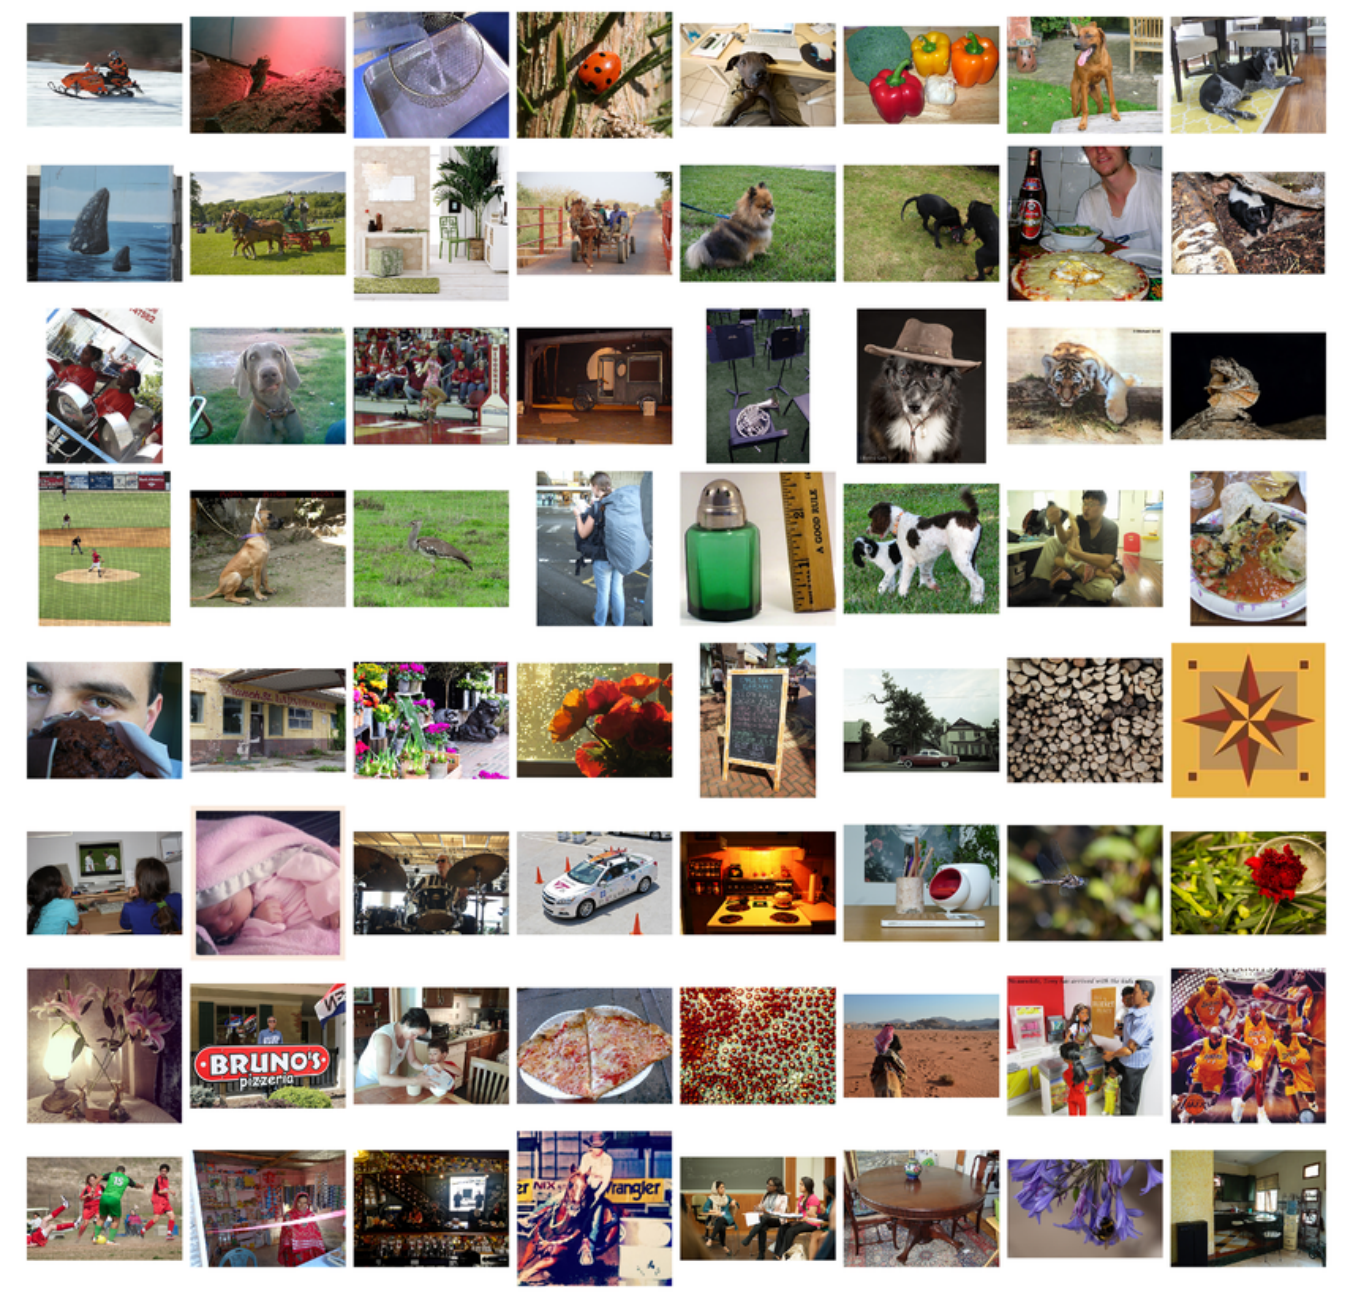



The birth of artificial neural networks can be traced at least as far back as the perceptron of [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt) in 1958. The excitement in neural networks reached a peak during the 1980’s, after which interest started to wane as methods like support vector machines (SVMs) started to find favor among researchers and practitioners. All of that changed around 2010. The revival of artificial neural networks started inauspiciously enough when Fei-Fei Li conceived the idea of gathering a really large dataset of images, called [ImageNet](https://qz.com/1034972/the-data-that-changed-the-direction-of-ai-research-and-possibly-the-world/). 

Her idea was simple: better and more data will lead to better algorithms. Building ImageNet was not simple, however. The solution was Amazon's Mechanical Turk, an internet-based crowdsourcing endeavor. Even so, it took two-and-a-half years to build and label the 3.5 million images into 5,247 different object categories. Since 2010, the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) has used a subset with 'only' 1,000 different categories. More precisely, each image contains an object, or even more than one object, belonging to one of the 1,000 object categories. The challenge is to assign the dominant object to the appropriate category. 
<br>
TThe best results obtained in 2011 had an error rate of about 25%. The very next year that dropped to an astonishing 16% by the deep neural network of  [Krizhevsky,  Sutskever and Hinton](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf). Today, deep neural networks perform better than humans, on a problem long-considered to be a uniquely human endeavor. The figure below shows the top five classification results from the Hinton paper, together with the correct classification. 

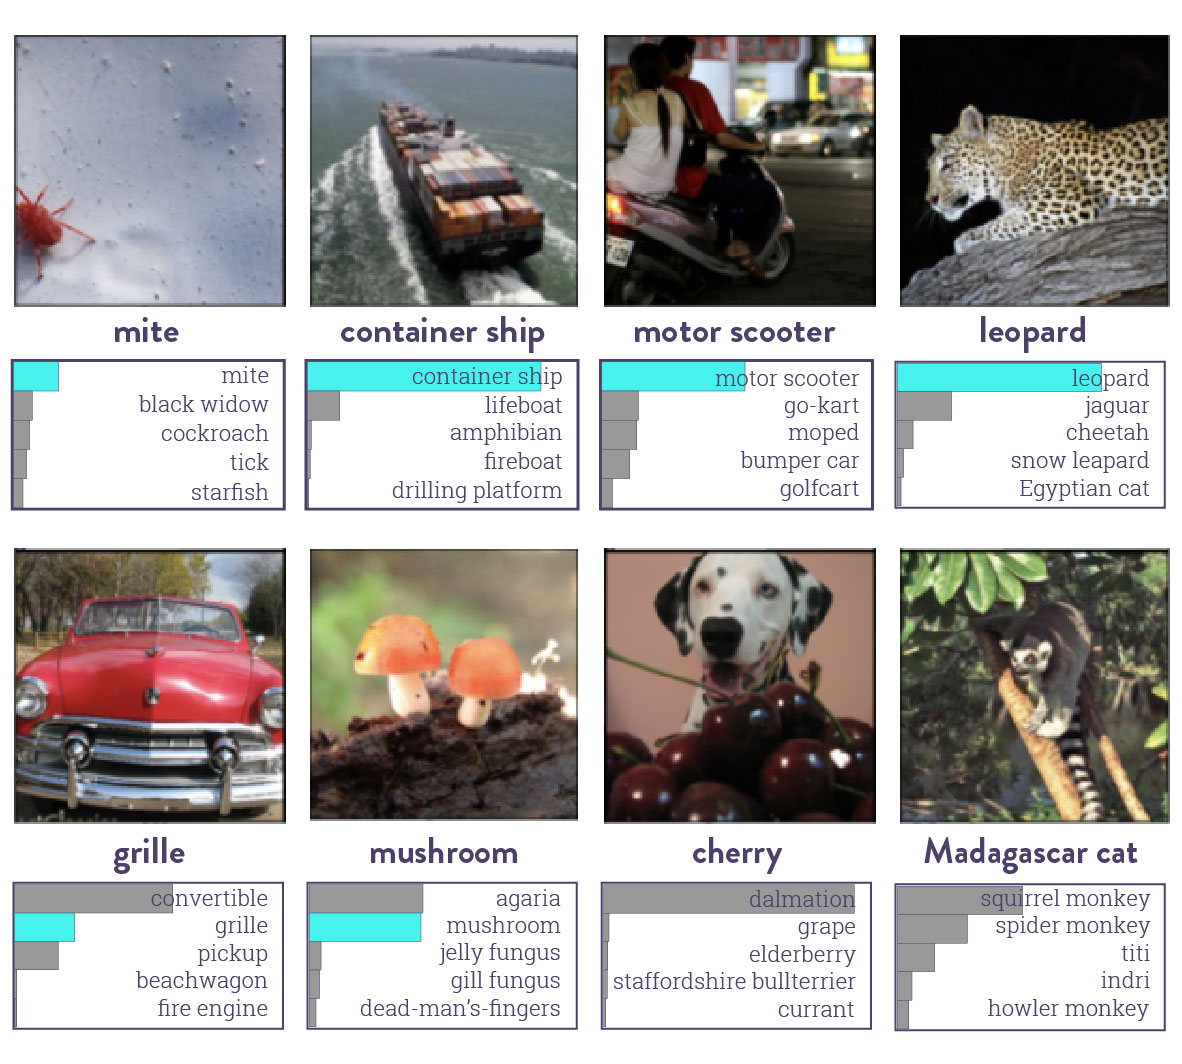
<table class="image" align="right" width=300px style="float: left">
    <caption align="bottom"><b>Classification results from ImageNet</b></caption>

What has brought about this remarkable progress? It is probably not possible to point to any single factor, but three things do stand out. The first is the availability of a massive amount of training data, as pointed out above. The second is the availability of sufficient computer power to process all this data, in the form of sufficiently powerful GPU’s. These two advances made it possible to train deep networks. Of course – and this is the third factor – there were also significant advances in the algorithms themselves. Once it was clear that it is possible to train deep neural networks, innovative neural network architectures were developed.

One should also point out another significantly different approach to the problem. In more traditional approaches, researchers spent much effort on so-called feature engineering. The idea was to encode domain knowledge by transforming the data into something that best reflects human understanding of the problem. With the availability of massive amounts of data, there is little or no emphasis on feature engineering; although it is possible to use human engineered features, if that is desirable. The idea behind a deep neural network is that the network should extract the relevant features, moving from low to higher-level features as the data flows through the network.
<br><br><br>

---
## Neural network basics

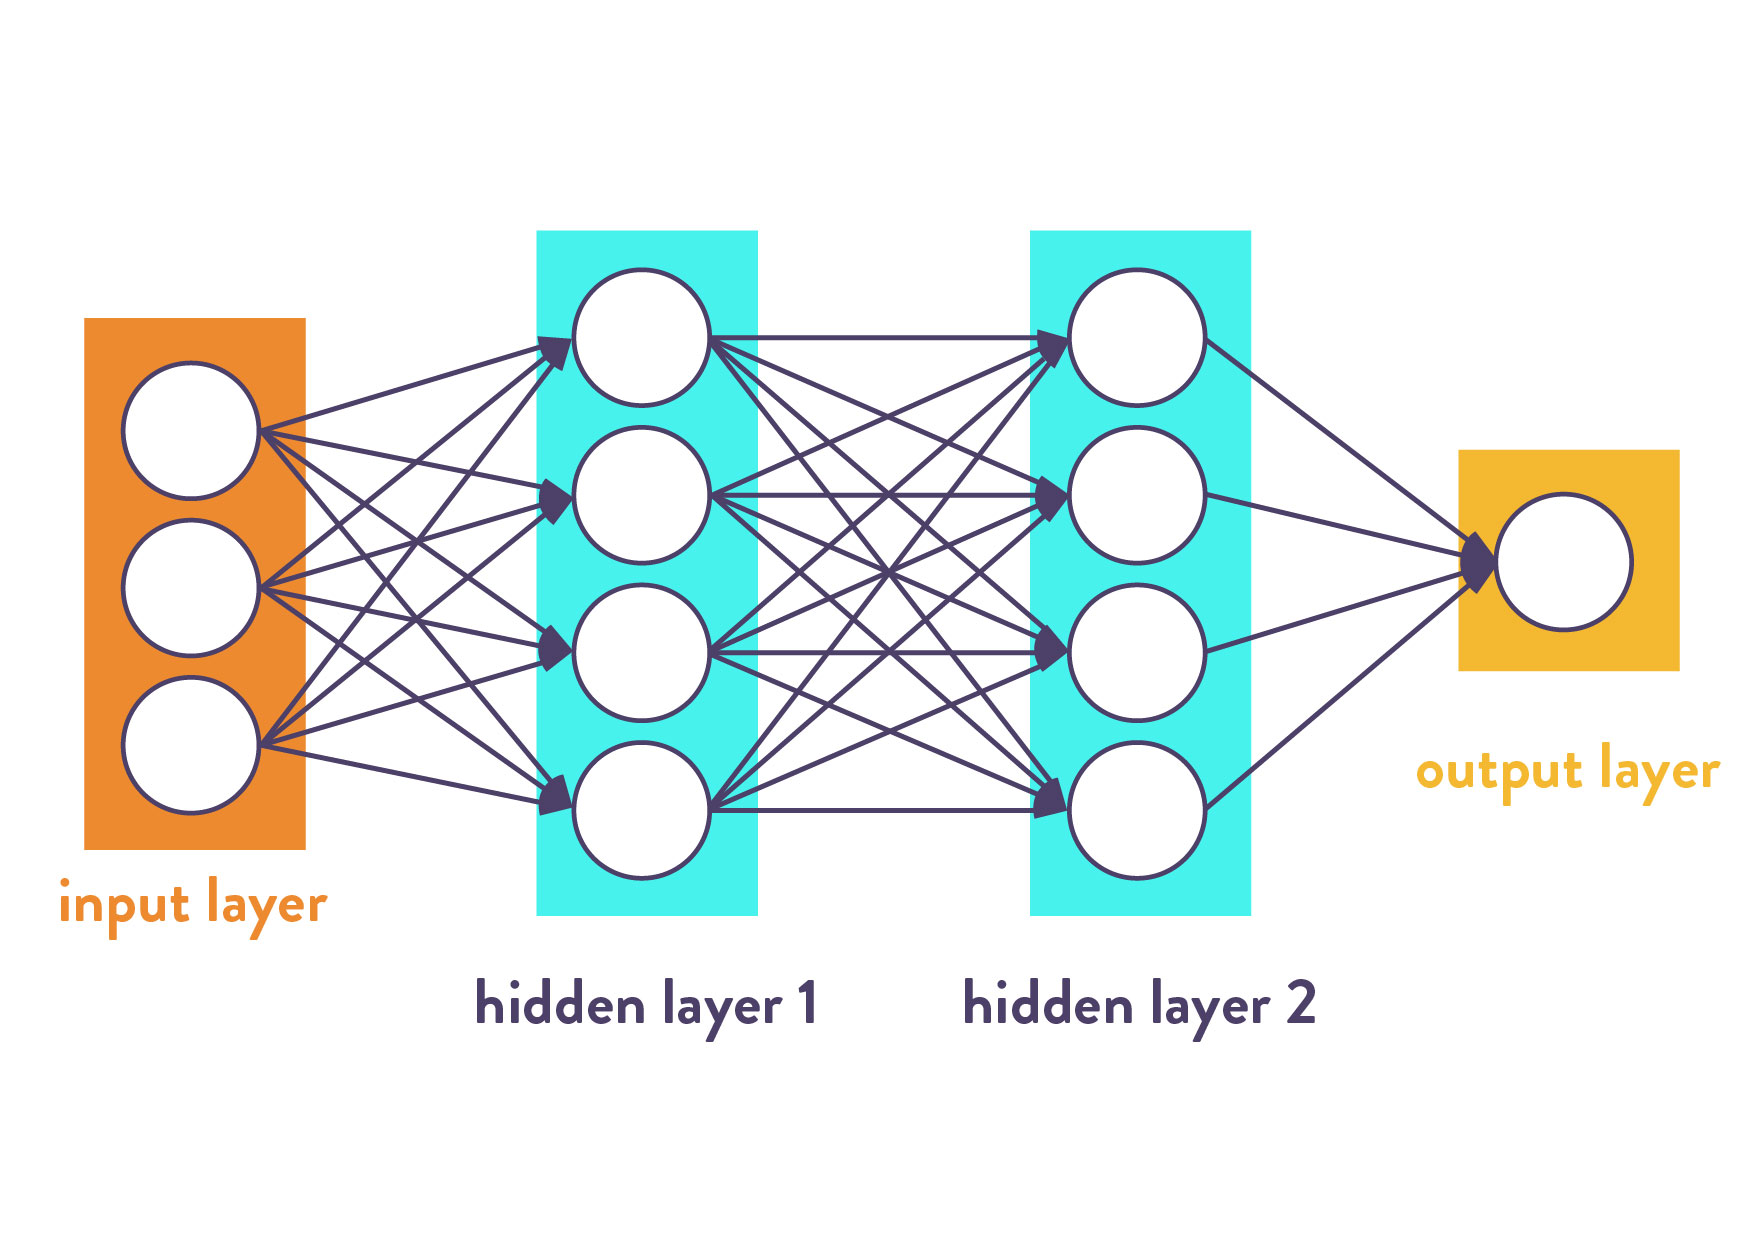

The Figure above shows a neural network with an input layer, two hidden layers, and an output layer. This is the basic structure of all **feedforward** neural networks. The main differences are in what exactly happens in the different layers.

The output layer returns the solution of the problem we are after. In neural networks, one can solve one of two different problems – namely, the **classification problem**, or the **regression problem**. The difference between the two lies in the nature of the output. For classification, the output is discrete; for regression, the output is continuous. You may think that this severely restricts the scope of the problems solvable by neural networks, but that is only partially true. Researchers are discovering more and more innovative ways of casting their problems as either a classification or regression problem. 
<br><br><br><br>

---
## SoftMax classification as a neural network

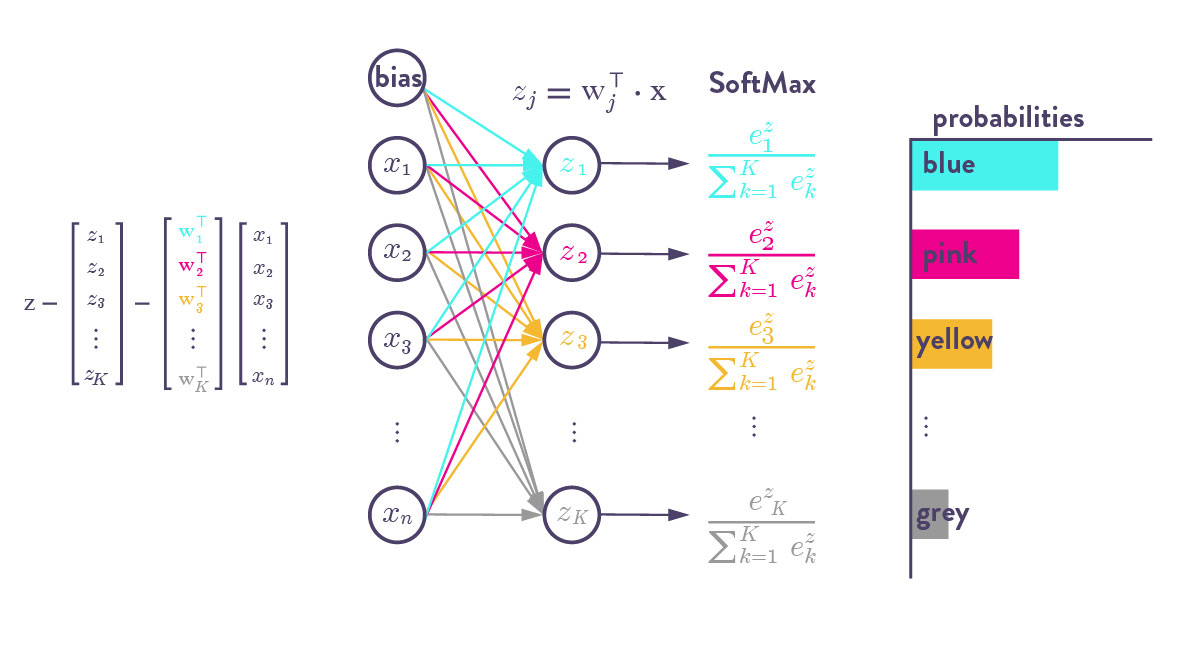


The Figure above shows the by-now-familiar SoftMax classifier, interpreted as a single-layer neural network.  
<br>
Let us briefly look at the ingredients again. The input is a $d$-dimensional vector $\mathbf{x}=[x_1,\ldots,x_d]^T$. The single layer is a fully connected, linear layer with neurons,
$$
z_j = \sum_{i=1}^d w_{ij}x_i + b_j,
$$
or more compactly as
$$
z_j = \mathbf{w}_j^T\mathbf{x},
$$
where we re-define $\mathbf{x}=[x_1,\ldots,x_d, 1]^T$ and $\mathbf{w}_j = [w_{1j},\ldots,w_{d,j},b_j]^T$. The *logits*, $z_j$ are then passed through the softmax function as indicated in the figure.
<br>
The SoftMax function is a perfectly good classifier, we'll continue to use it even as we extend our neural networks. The main difference will be that we will add more layers and inject nonlinearities into the layer. There are a few other things that will prove necessary, but we will cover these later. 

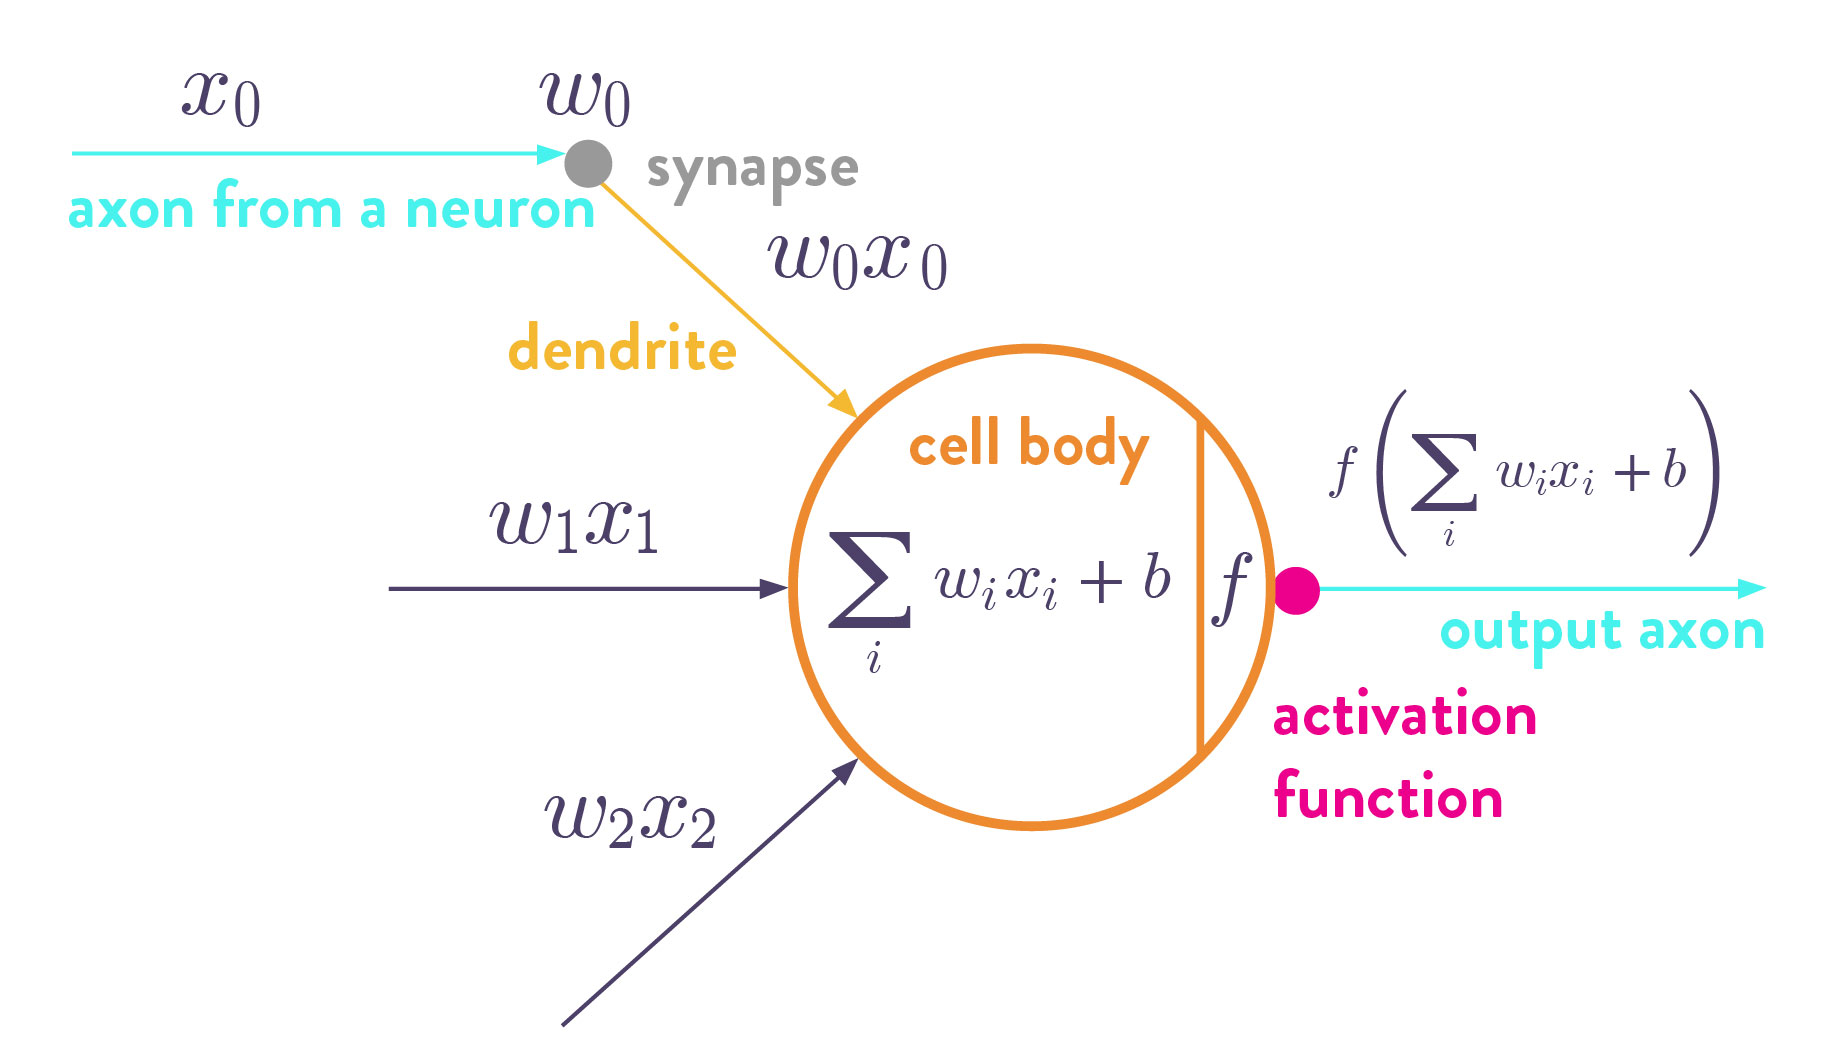
<br>
The Figure above shows the basic structure of a single neuron. . It takes a linear combination plus offset of the previous layer, as explained in the image above, followed by a nonlinear activation function. There are several activation functions used in practice, some of which we will engage with later. Their purpose is to inject nonlinearities into the system. This is, of fundamental importance. Without nonlinearities, there will be no point in stacking different layers. The end result can still be expressed as a single linear layer. 
<br><br><br><br><br><br><br><br><br>
 
---
## The sigmoid activation function


One of the most important – yet not always the best – activation functions is the **sigmoid activation function**,

$$
\sigma(x) = \frac{1}{1+\exp(-x)},
$$
    with shape shown in a code cell below (the s like shape). Note that it maps any real number, $-\infty < x < \infty$ to a real number in $(0,1)$. This it associates something we can think of as a probability to any real number $x$. Here we are not as much interested in this fact as in another awesome property: Equipped with the sigmoid activation function, a neural network become an universal approximator. This simply means that it is possible to approximate any (sufficiently smooth) function with the neural network. 
<br>

In the rest of this notebook we explore the intuition behind this idea.

First we import a few useful functions:

In [0]:
import IPython.display
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.facecolor'] = "0.92"

In [0]:
# The sigmoid funtion.
def σ(x):
    "Logistic sigmoid"
    return 1 / ( 1 + np.exp(-x))

x = np.linspace(-10, 10)
plt.plot(x, σ(x));

---
## A neural network as universal approximator.

The function that we will try and approximate is given by,

$$
f(x) = 0.2 + 0.4x^2 + 0.3x\sin(15x) + 0.05 \cos(50x).
$$

**Example**

Let us see how we can approximate the following function, using TensorFlow.

In [0]:
def f(x):
     return 0.2 + 0.4 * x**2 + 0.3 * x * np.sin(15 * x) + 0.05 * np.cos(50 * x)
    
resolution = 100
x = np.linspace(0,1,resolution)
y = f(x)

# Plot
plt.plot(x,y)
plt.show()# The neural network.

**The neural network.**

The neural network we'll use consists of the following:

1. Single hidden layer with sigmoid activations.
2. Input:  **x = np.linspace(0, 1 ,100)**
3. Neural network output: $\sigma(w \mathbf{x} + \mathbf{b})$, where $\mathbf{b}$ is a vector of offsets.
4. Target output:  $\mathbf{y} = f(\mathbf{x})$.

* For simplicity we use only a single, tied weight $w$ which we fix at $w=100$.
* Each neuron in the single hidden layer is therefore given by 
$$  z_j = \sigma(w*\mathbf{x} + b_j).$$ 
 

 

Let us see what kind of flexibility this network allows us.

**Note**: that we are not trying to fit the function yet, we are just looking at the shape of the hidden neurons. 

### Set up the computational graph

#### Construction phase

In [0]:
tf.reset_default_graph()    
x = np.linspace(0.0, 1.0, resolution, dtype=np.float32)  # The input values. 
x = x[:, np.newaxis]  # The additional axis is added so that the broadcasting below works correctly
n_neurons = 2 * 5      # The number of hidden neurons. For convenience we want it to be an even number.

w = tf.constant(100.)          # Set it at a reasonably large value. 
b = -w * tf.constant(np.linspace(0.0, 1.0, n_neurons, dtype=np.float32)) 
# Note that the biases b shift the sigmoid function to the right.
# We'll illustrate this below. 

x_ = tf.placeholder(tf.float32)
out = tf.nn.sigmoid(w*x_+b)
init_op = tf.global_variables_initializer()

#### Execution phase (run session)

In [0]:
with tf.Session() as sess:
    sess.run(init_op)
    z = sess.run(out,feed_dict={x_:x})

#### Display the neurons in the hidden layer

In [0]:
from ipywidgets import interact

def show_neurons(k=0):
    """
    Display the neurons in the hidden layer
    """
    plt.plot(x, z[:, k])  
    plt.show()
    
w = interact(show_neurons, k =(0, n_neurons-1)) 

**Conclusion:**
The different neurons are just translated sigmoid functions.

### Combining the hidden neurons

The given function can be approximated by appropriately combining the different neurons:

In [0]:
plt.plot(x, z[:, 4] - z[:, 5])
plt.show()

**Note:** This looks a bit like a piecewise constant function.

### Combine pairwise

In [0]:
def show_combined(k=0):
    """
    Display the neurons in the hidden layer
    """
    plt.plot(x, z[:, k] - z[:, k + 1])  
    plt.show()
    
w = interact(show_combined, k =(0, n_neurons - 2)) 

### Train the network to approximate the function above

Train for the heights of the *piecewise constant* functions (above).


In [0]:
tf.reset_default_graph()
n_neurons = 2 * 50     # Specify an even number
x = np.linspace(0.0, 1.0, resolution,dtype=np.float32)
x = x[:,np.newaxis]

w = tf.constant(100.0)  # This defines the `steepness' of the sigmoid.
                       # We want to have it steep in order to approximate a 
                       # piecewise constant function.
        
b = -w * tf.constant(np.linspace(0.0, 1.0 , n_neurons, dtype=np.float32))
j = [i for i in range(n_neurons)]
q = np.ones(n_neurons)
q[1::2] = -q[1::2]
q = np.array(q, dtype=np.float32)
w1 = tf.Variable(q)

x_ = tf.placeholder(tf.float32)
y_ = tf.placeholder(tf.float32)

out1 = tf.nn.sigmoid(w * x_ + b) * w1
out = tf.reduce_sum(out1, axis=1)
cost = tf.reduce_sum((out-y_)**2)

train_step = tf.train.GradientDescentOptimizer(0.0001).minimize(cost)

init_op = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    for i in range(1000):
        train_step.run(feed_dict={x_: x, y_: y})
        
    z = sess.run(out,feed_dict={x_:x})
    err = sess.run(cost,feed_dict={x_:x,y_:y})
    weight = sess.run(w1)
    offset = sess.run(b)

# Plot and print cost
print('Cost:',err)  
plt.plot(x,z,x,y)
plt.show()

**Conclusion**: Although a little smoothed out, we indeed get a reasonable approximation of the original function.